In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

from skimage.io import imread
from skimage import img_as_float

#  Уменьшение количества цветов изображения. Кластеризация

Загрузите картинку parrots.jpg. 
Преобразуйте изображение, приведя все значения в интервал от 0 до 1. 
Для этого можно воспользоваться функцией img_as_float из модуля skimage. 
Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

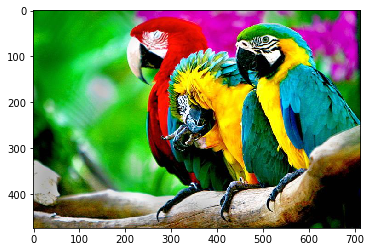

In [10]:
image = img_as_float(imread('parrots.jpg'))
pylab.imshow(image)
plt.show()

Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [33]:
X = [ list(rgb) for row in image for rgb in row ]

Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. 
После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', random_state=241).fit(X)

In [102]:
red = np.array([x[0] for x in X]).ravel()
green = np.array([x[1] for x in X]).ravel()
blue = np.array([x[2] for x in X]).ravel()

df = pd.DataFrame(data=np.array([kmeans.labels_, red, green, blue]).T, columns=['cluster_id', 'red','green','blue'])
df['cluster_id'] = df['cluster_id'].astype(int)
df.head()

,cluster_id,red,green,blue
0,4,0.015686,0.494118,0.019608
1,4,0.007843,0.494118,0.007843
2,4,0.007843,0.494118,0.007843
3,4,0.007843,0.494118,0.007843
4,4,0.007843,0.501961,0.011765


In [109]:
df_mean = df.groupby('cluster_id').mean()
df['red_mean'] = [df_mean.iloc[i]['red'] for i in df['cluster_id']]
df['green_mean'] = [df_mean.iloc[i]['green'] for i in df['cluster_id']]
df['blue_mean'] = [df_mean.iloc[i]['blue'] for i in df['cluster_id']]

df.head()

,cluster_id,red,green,blue,red_m,red_mean,green_mean,blue_mean
0,4,0.015686,0.494118,0.019608,4,0.095647,0.635567,0.066917
1,4,0.007843,0.494118,0.007843,4,0.095647,0.635567,0.066917
2,4,0.007843,0.494118,0.007843,4,0.095647,0.635567,0.066917
3,4,0.007843,0.494118,0.007843,4,0.095647,0.635567,0.066917
4,4,0.007843,0.501961,0.011765,4,0.095647,0.635567,0.066917


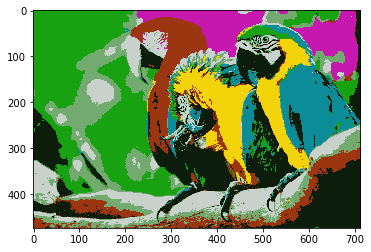

In [139]:
image_new = df[['red_mean', 'green_mean', 'blue_mean']].as_matrix().reshape(image.shape[0], image.shape[1], 3)
pylab.imshow(image_new)
plt.show()

Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно

In [156]:
from skimage import img_as_ubyte
import math

def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10 * math.log10(float(1) / mse)

psnr_init = psnr(image, image_new)
print('PSNR initial value = {:.3f}'.format(psnr_init))

PSNR initial value = 13.153


Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

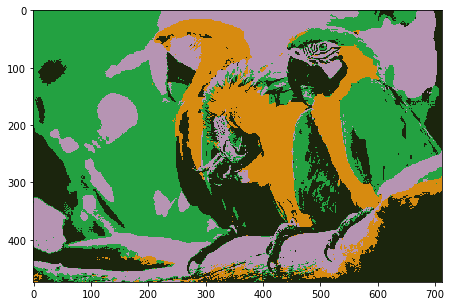

Number of clusters = 4, PSNR = 14.368


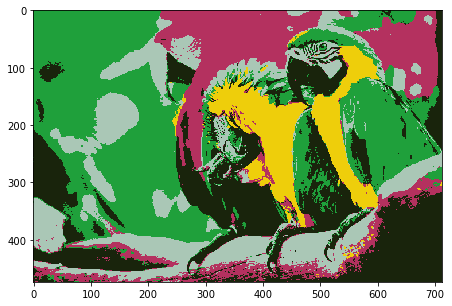

Number of clusters = 5, PSNR = 15.527


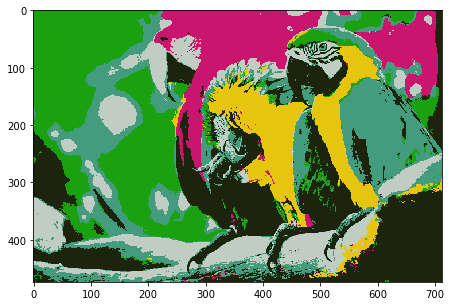

Number of clusters = 6, PSNR = 16.544


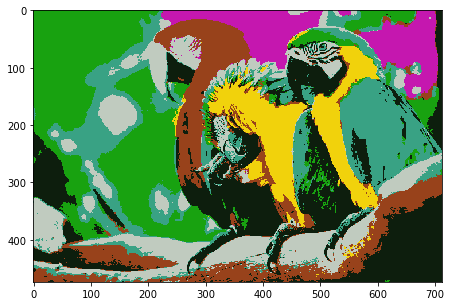

Number of clusters = 7, PSNR = 17.641


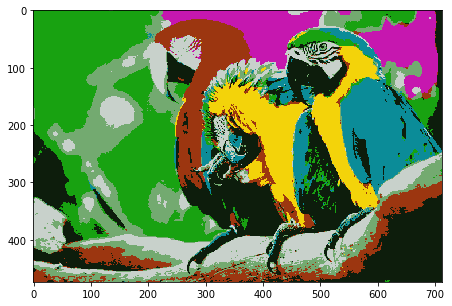

Number of clusters = 8, PSNR = 18.437


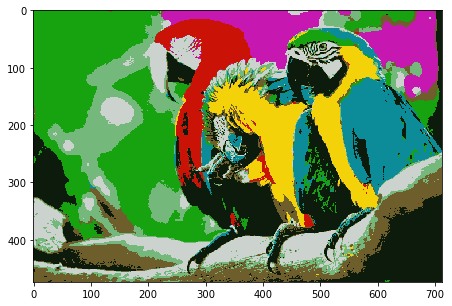

Number of clusters = 9, PSNR = 19.113


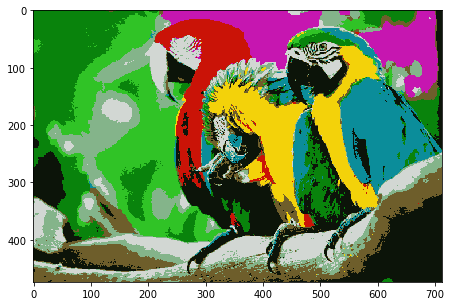

Number of clusters = 10, PSNR = 19.641


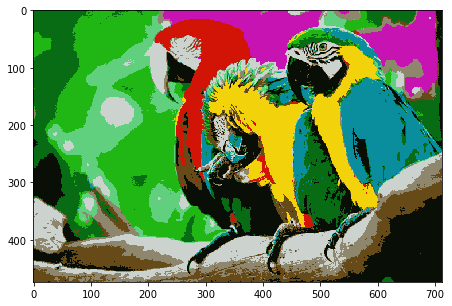

Number of clusters = 11, PSNR = 20.128


In [157]:
for cluster_numb in range(4, 15):
    kmeans = KMeans(n_clusters=cluster_numb, random_state=241).fit(X)
    
    red = np.array([x[0] for x in X]).ravel()
    green = np.array([x[1] for x in X]).ravel()
    blue = np.array([x[2] for x in X]).ravel()

    df = pd.DataFrame(data=np.array([kmeans.labels_, red, green, blue]).T, columns=['cluster_id', 'red','green','blue'])
    df['cluster_id'] = df['cluster_id'].astype(int)
    
    df_mean = df.groupby('cluster_id').mean()
    df['red_mean'] = [df_mean.iloc[i]['red'] for i in df['cluster_id']]
    df['green_mean'] = [df_mean.iloc[i]['green'] for i in df['cluster_id']]
    df['blue_mean'] = [df_mean.iloc[i]['blue'] for i in df['cluster_id']]
    
    image_new = df[['red_mean', 'green_mean', 'blue_mean']].as_matrix().reshape(image.shape[0], image.shape[1], 3)
    fig = plt.figure(figsize=(10,5))
    pylab.imshow(image_new)
    plt.savefig('parrot_clust{0}.png'.format(cluster_numb))
    plt.show()
    
    psnr_init = psnr(image, image_new)
    print('Number of clusters = {:}, PSNR = {:.3f}'.format(cluster_numb, psnr_init))
    if psnr_init > 20.:
        with open('6_1.txt', 'w') as out_f:
            out_f.write(str(cluster_numb))
        break